In [1]:
import pandas as pd
import keras
import matplotlib.pyplot as plt

C:\Users\Harmony25\AppData\Local\Temp\ipykernel_9784\3192728849.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
train_df = pd.read_csv(r"C:\Users\Harmony25\Desktop\LECTURE\04.Fundamental\data\asl_data\sign_mnist_train.csv")
valid_df = pd.read_csv(r"C:\Users\Harmony25\Desktop\LECTURE\04.Fundamental\data\asl_data\sign_mnist_valid.csv")

# 데이터 살펴보기
print(train_df.describe())

              label        pixel1        pixel2        pixel3        pixel4  \
count  27455.000000  27455.000000  27455.000000  27455.000000  27455.000000   
mean      11.679476    145.419377    148.500273    151.247714    153.546531   
std        6.880558     41.358555     39.942152     39.056286     38.595247   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.000000    121.000000    126.000000    130.000000    133.000000   
50%       12.000000    150.000000    153.000000    156.000000    158.000000   
75%       18.000000    174.000000    176.000000    178.000000    179.000000   
max       23.000000    255.000000    255.000000    255.000000    255.000000   

             pixel5        pixel6        pixel7        pixel8        pixel9  \
count  27455.000000  27455.000000  27455.000000  27455.000000  27455.000000   
mean     156.210891    158.411255    160.472154    162.339683    163.954799   
std       37.111165     36.125579     35.016392    

In [3]:
# 레이블 추출
y_train = train_df['label']
y_valid = valid_df['label']
del train_df['label']
del valid_df['label']

# 이미지 추출
x_train = train_df.values
x_valid = valid_df.values

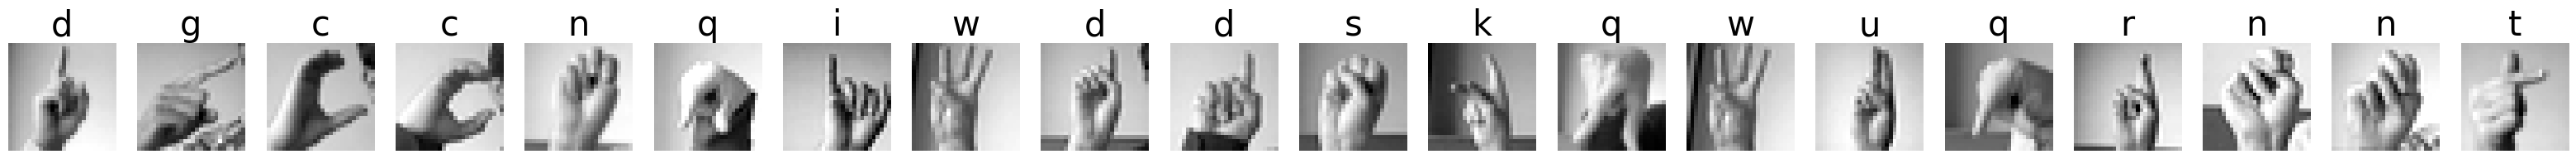

In [4]:
# 데이터 시각화
plt.figure(figsize=(40,20))

num_images = 20
for i in range(num_images):
    row = x_train[i]
    label = chr(y_train[i] + 97) if y_train[i] < 9 else chr(y_train[i] + 98)
    
    image = row.reshape(28,28)
    plt.subplot(1, num_images, i+1)
    plt.title(label, fontdict={'fontsize': 30})
    plt.axis('off')
    plt.imshow(image, cmap='gray')
plt.show()

In [5]:
# chr(숫자) : 숫자에 해당하는 ascii 문자 출력
# ord('문자') : 문자에 해당하는 ascii 숫자 출력

# # 데이터 정규화
x_train = x_train / 255
x_valid = x_valid / 255

num_classes = 24

# one-hot-encoding _ method_1
y_train = keras.utils.to_categorical(y_train.ravel(), num_classes=num_classes)  #(27455, 24)
y_valid = keras.utils.to_categorical(y_valid.ravel(), num_classes=num_classes)

# # one-hot-encoding _ method_2
# from sklearn import preprocessing
# enc = preprocessing.LabelBinarizer()
# y_train = enc.fit_transform(y_train)
# y_valid = enc.fit_transform(y_valid)

print(x_train)

[[0.41960784 0.4627451  0.49803922 ... 0.8        0.79607843 0.79215686]
 [0.60784314 0.61568627 0.61176471 ... 0.40392157 0.52941176 0.58431373]
 [0.73333333 0.7372549  0.7372549  ... 0.76470588 0.76078431 0.76470588]
 ...
 [0.68235294 0.68235294 0.68235294 ... 0.79215686 0.78431373 0.78431373]
 [0.69411765 0.70980392 0.72156863 ... 0.25098039 0.34117647 0.36470588]
 [0.70196078 0.70588235 0.70588235 ... 0.80392157 0.81960784 0.84313725]]


C:\Users\Harmony25\AppData\Local\Temp\ipykernel_9784\2953106556.py:11: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train = keras.utils.to_categorical(y_train.ravel(), num_classes=num_classes)  #(27455, 24)
C:\Users\Harmony25\AppData\Local\Temp\ipykernel_9784\2953106556.py:12: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_valid = keras.utils.to_categorical(y_valid.ravel(), num_classes=num_classes)


In [6]:
# 모델 구축
# 512, relu / 512, relu / 24, softmax
model = keras.Sequential()
model.add(keras.layers.Dense(input_shape=(784,), units=512, activation='relu'))
    # input_shape(784,) : feature의 갯수를 784개로 한다
model.add(keras.layers.Dense(units=512, activation='relu'))
model.add(keras.layers.Dense(units=num_classes, activation='softmax'))
model.compile(optimizer=keras.optimizers.RMSprop(0.001),
              loss=keras.losses.categorical_crossentropy,
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=20, verbose=1, validation_data=(x_valid, y_valid))

model.summary()


Epoch 1/20


858/858 [==============================] - 5s 5ms/step - loss: 1.9607 - accuracy: 0.3785 - val_loss: 1.4514 - val_accuracy: 0.5290
Epoch 2/20
858/858 [==============================] - 4s 5ms/step - loss: 0.9718 - accuracy: 0.6745 - val_loss: 1.3322 - val_accuracy: 0.5524
Epoch 3/20
858/858 [==============================] - 4s 5ms/step - loss: 0.5865 - accuracy: 0.8025 - val_loss: 1.0499 - val_accuracy: 0.6834
Epoch 4/20
858/858 [==============================] - 4s 5ms/step - loss: 0.3999 - accuracy: 0.8726 - val_loss: 1.0544 - val_accuracy: 0.7471
Epoch 5/20
858/858 [==============================] - 4s 5ms/step - loss: 0.2901 - accuracy: 0.9124 - val_loss: 0.9360 - val_accuracy: 0.7687
Epoch 6/20
858/858 [==============================] - 5s 5ms/step - loss: 0.2435 - accuracy: 0.9312 - val_loss: 1.6683 - val_accuracy: 0.6898
Epoch 7/20
858/858 [==============================] - 4s 5ms/step - loss: 0.2068 - accuracy: 0.9473 - val_loss: 0.9074 - val_accuracy: 0.7952
Epo